In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


In [2]:
train =pd.read_csv("/kaggle/input/GiveMeSomeCredit/cs-training.csv").drop("Unnamed: 0",axis=1);
test=pd.read_csv("/kaggle/input/GiveMeSomeCredit/cs-test.csv").drop("Unnamed: 0",axis=1);



In [3]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [4]:
train.shape


(150000, 11)

In [5]:
train.duplicated().value_counts()


False    149391
True        609
Name: count, dtype: int64

In [6]:
train=train.drop_duplicates()

In [7]:
train.duplicated().sum()

0

In [8]:
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [9]:
def findMissing_per(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [10]:
findMissing_per(train)


SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [11]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,1.201700e+05,149391.000000,149391.000000,149391.000000,149391.000000,145563.000000
mean,0.066999,6.071087,52.306237,0.393886,354.436740,6.675098e+03,8.480892,0.238120,1.022391,0.212503,0.759863
std,0.250021,250.263672,14.725962,3.852953,2041.843455,1.438958e+04,5.136515,3.826165,1.130196,3.810523,1.116141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030132,41.000000,0.000000,0.177441,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556494,63.000000,0.000000,0.875279,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [12]:
train['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [13]:
train.groupby(['NumberOfDependents']).size()

NumberOfDependents
0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

In [14]:
fam_miss=train[train.NumberOfDependents.isnull()]
fam_nmiss=train[train.NumberOfDependents.notnull()]

In [15]:
fam_miss["NumberOfDependents"]=fam_miss["NumberOfDependents"].fillna(0)
fam_miss["MonthlyIncome"]=fam_miss["MonthlyIncome"].fillna(0)


/tmp/ipykernel_33/188391236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss["NumberOfDependents"]=fam_miss["NumberOfDependents"].fillna(0)
/tmp/ipykernel_33/188391236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss["MonthlyIncome"]=fam_miss["MonthlyIncome"].fillna(0)


In [16]:
fam_nmiss["MonthlyIncome"].agg(['mean','median',"max","min"])

mean      6.675098e+03
median    5.400000e+03
max       3.008750e+06
min       0.000000e+00
Name: MonthlyIncome, dtype: float64

In [17]:
fam_nmiss["MonthlyIncome"]=fam_nmiss["MonthlyIncome"].fillna(fam_nmiss["MonthlyIncome"].agg('median'))

/tmp/ipykernel_33/1054521306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss["MonthlyIncome"]=fam_nmiss["MonthlyIncome"].fillna(fam_nmiss["MonthlyIncome"].agg('median'))


In [18]:
train_filled = pd.concat([fam_nmiss, fam_miss], ignore_index=True)

In [19]:
findMissing_per(train_filled)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [20]:
train_filled.groupby('SeriousDlqin2yrs').size()/train_filled.shape[0]

SeriousDlqin2yrs
0    0.933001
1    0.066999
dtype: float64

In [21]:
train_filled.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [22]:
train_filled[train_filled['RevolvingUtilizationOfUnsecuredLines']>1].groupby('SeriousDlqin2yrs').size()  
# cannot remove data having greater than 1 beacause we will loose large amount of defaulters and data will become imbalanced

SeriousDlqin2yrs
0    2084
1    1237
dtype: int64

In [23]:
util_dropped=train_filled.drop(train_filled[train_filled["RevolvingUtilizationOfUnsecuredLines"]>10].index)

In [24]:
util_dropped.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


<Axes: >

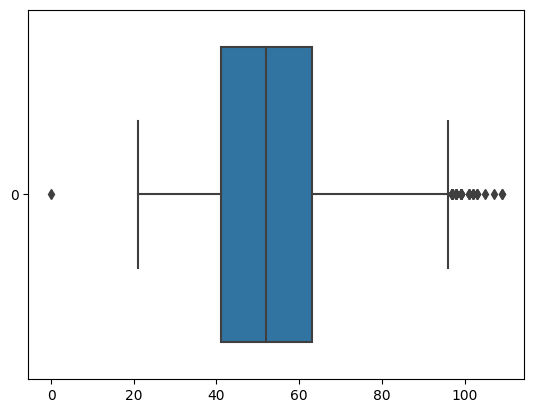

In [25]:
sns.boxplot(util_dropped['age'],orient='h')

In [26]:
util_dropped.groupby("age").size()
#no need to remove age=0 outlier 

age
0        1
21     162
22     368
23     592
24     782
      ... 
102      3
103      3
105      1
107      1
109      2
Length: 86, dtype: int64

In [27]:
util_dropped.groupby('NumberOfTime30-59DaysPastDueNotWorse').size()

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [28]:
util_dropped.groupby('NumberOfTime60-89DaysPastDueNotWorse').size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [29]:
util_dropped.groupby('NumberOfTimes90DaysLate').size()

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [30]:
util_dropped[util_dropped['NumberOfTimes90DaysLate']>=96].groupby('SeriousDlqin2yrs').size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [31]:
util_dropped['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<Axes: >

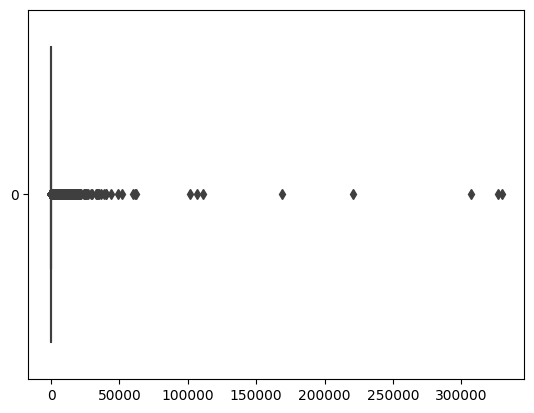

In [32]:
sns.boxplot(util_dropped['DebtRatio'],orient='h')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DebtRatio', ylabel='Density'>

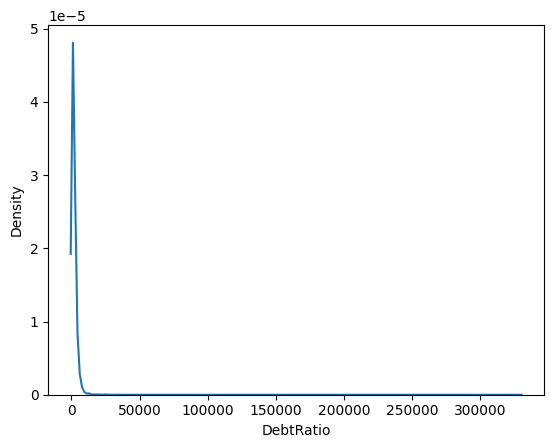

In [33]:
sns.kdeplot(util_dropped['DebtRatio'])

In [34]:
util_dropped[util_dropped['DebtRatio']>3500].groupby("SeriousDlqin2yrs").size()

SeriousDlqin2yrs
0    3465
1     240
dtype: int64

In [35]:
temp=util_dropped[(util_dropped['DebtRatio']>3500) & (util_dropped['SeriousDlqin2yrs']==util_dropped['MonthlyIncome'])]

temp.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
89,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
319,0,0.013115,43,0,4211.0,0.0,21,0,2,0,2.0
495,0,1.000000,73,0,8500.0,0.0,2,0,0,0,0.0
816,0,0.734284,45,0,11311.0,0.0,6,0,2,1,0.0
3276,0,1.000000,45,0,9260.0,0.0,7,0,4,0,4.0


In [36]:
temp.groupby(["SeriousDlqin2yrs"]).size()

SeriousDlqin2yrs
0    378
1      2
dtype: int64

In [37]:
dRatio=util_dropped.drop(temp.index)
dRatio.shape

(148770, 11)

In [38]:
dRatio.groupby(['SeriousDlqin2yrs']).size()
#imbalanced dataset

SeriousDlqin2yrs
0    138780
1      9990
dtype: int64

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
model =XGBClassifier(tree_method="exact")

In [41]:
x=dRatio.drop(["SeriousDlqin2yrs"],axis=1) #independent variables
y=dRatio['SeriousDlqin2yrs'] #dependent variables

In [42]:
model.fit(x,y.values.ravel())
y_pred=model.predict(x)
accuracy_score(y,y_pred)

0.9462929354036432

In [43]:
cm=confusion_matrix(y,y_pred)

Text(50.722222222222214, 0.5, 'actuals')

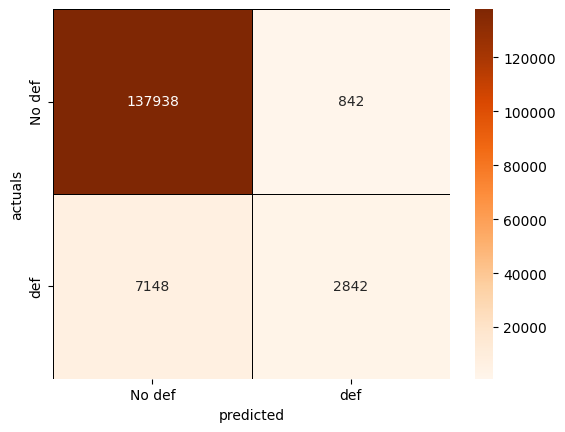

In [45]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")


In [50]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    138780
           1       0.77      0.28      0.42      9990

    accuracy                           0.95    148770
   macro avg       0.86      0.64      0.69    148770
weighted avg       0.94      0.95      0.93    148770

